In [12]:
!pip install  opencv-python

In [13]:
!pip install matplotlib

In [14]:
!pip install tensorflow

In [65]:
# Import standard dependencies
import cv2
import os
import random
import numpy as np
from matplotlib import pyplot as plt

In [66]:
# Import tensorflow dependencies - Functional API
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Layer, Conv2D, Dense, MaxPooling2D, Input, Flatten
import tensorflow as tf
import tensorflow as tf
tf.get_logger().setLevel('ERROR')  # Set logging level to ERROR to hide INFO messages
import warnings
warnings.filterwarnings("ignore", category=UserWarning, module="tensorflow")


In [17]:
# Avoid OOM errors by setting GPU Memory Consumption Growth
gpus = tf.config.experimental.list_physical_devices('GPU')
for gpu in gpus: 
    tf.config.experimental.set_memory_growth(gpu, True)

In [18]:
# Setup paths
POS_PATH = os.path.join('data', 'positive')
NEG_PATH = os.path.join('data', 'negative')
ANC_PATH = os.path.join('data', 'anchor')

In [9]:
# Make the directories
os.makedirs(POS_PATH)
os.makedirs(NEG_PATH)
os.makedirs(ANC_PATH)

FileExistsError: [Errno 17] File exists: 'data/positive'

In [ ]:
# Uncompress Tar GZ Labelled Faces in the Wild Dataset
!tar -xf lfw.tgz

In [19]:
for directory in os.listdir('lfw'):
    for file in os.listdir(os.path.join('lfw', directory)):
        EX_PATH = os.path.join('lfw', directory, file)
        NEW_PATH = os.path.join(NEG_PATH, file)
        os.replace(EX_PATH, NEW_PATH)

FileNotFoundError: [Errno 2] No such file or directory: 'lfw'

In [ ]:
os.listdir('lfw')

In [20]:
import uuid

In [21]:
os.path.join(ANC_PATH, '{}.jpg'.format(uuid.uuid1()))

'data/anchor/a82e22c8-754c-11ee-b450-367dda46ffdd.jpg'

In [68]:
# Establish a connection to the webcam
cap = cv2.VideoCapture(0)
while cap.isOpened(): 
    ret, frame = cap.read()
   
    # Cut down frame to 250x250px
    frame = frame[120:120+1250,200:200+1250, :]
    
    # Collect anchors 
    if cv2.waitKey(1) & 0XFF == ord('a'):
        # Create the unique file path 
        imgname = os.path.join(ANC_PATH, '{}.jpg'.format(uuid.uuid1()))
        # Write out anchor image
        cv2.imwrite(imgname, frame)
    
    # Collect positives
    if cv2.waitKey(1) & 0XFF == ord('p'):
        # Create the unique file path 
        imgname = os.path.join(POS_PATH, '{}.jpg'.format(uuid.uuid1()))
        # Write out positive image
        cv2.imwrite(imgname, frame)
    
    # Show image back to screen
    cv2.imshow('Image Collection', frame)
    
    # Breaking gracefully
    if cv2.waitKey(1) & 0XFF == ord('q'):
        break
        
# Release the webcam
cap.release()
# Close the image show frame
cv2.destroyAllWindows()

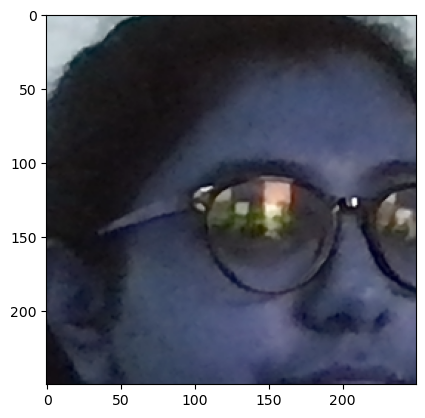

In [71]:
plt.imshow(frame[120:120+250,200:200+250, :])

## 3.1 Get Image Directories

In [45]:
import tensorflow as tf
import glob

# Specify the paths to the directories containing image files
ANC_PATH = '/Users/kritimathur/Desktop/Facial Recognition/data'
POS_PATH = '/Users/kritimathur/Desktop/Facial Recognition/data'
NEG_PATH = '/Users/kritimathur/Desktop/Facial Recognition/data'

# Define a function to load images from a directory
def load_images(directory, num_images=25):
    # Use the glob library to list all files with a '.jpg' extension
    file_paths = glob.glob(directory + '/*.jpg')
    file_paths = file_paths[:num_images]  # Take the first 'num_images' files
    # Load the image data
    images = [tf.image.decode_jpeg(tf.io.read_file(path)) for path in file_paths]
    return images

# Load images from the directories
anchor = load_images(ANC_PATH, num_images=25)
positive = load_images(POS_PATH, num_images=25)
negative = load_images(NEG_PATH, num_images=25)


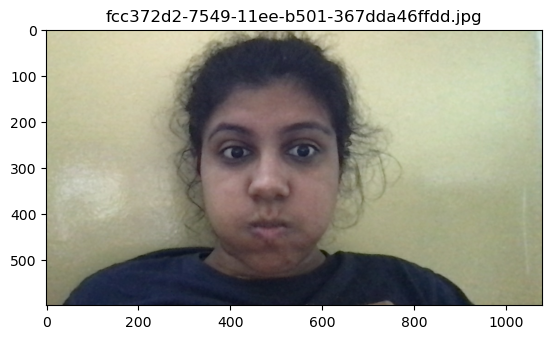

In [20]:
import tensorflow as tf
import glob
import os
import matplotlib.pyplot as plt

# Specify the paths to the directories containing image files
ANC_PATH = '/Users/kritimathur/Desktop/Facial Recognition/data/anchor'
POS_PATH = '/Users/kritimathur/Desktop/Facial Recognition/data/positive'
NEG_PATH = '/Users/kritimathur/Desktop/Facial Recognition/data/negative'

# Define a function to load images and their file names from a directory
def load_images_with_names(directory, num_images=25):
    # Use the glob library to list all files with a '.jpg' extension
    file_paths = glob.glob(directory + '/*.jpg')
    file_paths = file_paths[:num_images]  # Take the first 'num_images' files
    
    # Load the image data and collect file names
    images = []
    for path in file_paths:
        image_data = tf.image.decode_jpeg(tf.io.read_file(path)).numpy()
        file_name = os.path.basename(path)
        images.append((image_data, file_name))
    
    return images

# Load 300 images with their names from each of the directories
anchor = load_images_with_names(ANC_PATH, num_images=300)
positive = load_images_with_names(POS_PATH, num_images=300)
negative = load_images_with_names(NEG_PATH, num_images=300)

# Display the first image from the 'anchor' dataset along with its name
if anchor:
    first_image, first_image_name = anchor[0]
    plt.imshow(first_image)
    plt.title(first_image_name)
    plt.show()


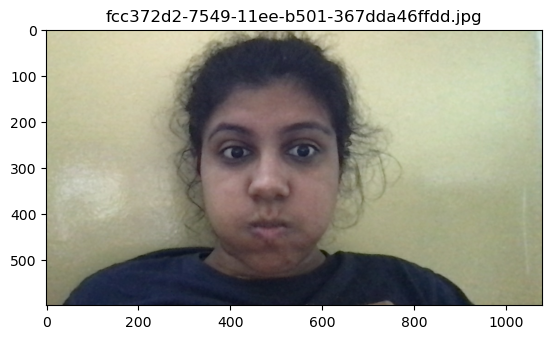

In [26]:
import tensorflow as tf
import glob
import os

# Specify the paths to the directories containing image files
ANC_PATH = '/Users/kritimathur/Desktop/Facial Recognition/data/anchor'
POS_PATH = '/Users/kritimathur/Desktop/Facial Recognition/data/positive'
NEG_PATH = '/Users/kritimathur/Desktop/Facial Recognition/data/negative'

# Define a function to load images and their file names from a directory
def load_images_with_names(directory, num_images=25):
    file_paths = glob.glob(directory + '/*.jpg')
    file_paths = file_paths[:num_images]
    
    images = []
    file_names = []
    for path in file_paths:
        image_data = tf.image.decode_jpeg(tf.io.read_file(path))
        file_name = os.path.basename(path)
        images.append(image_data)
        file_names.append(file_name)
    
    return images, file_names

# Load 300 images with their names from each of the directories
anchor_images, anchor_file_names = load_images_with_names(ANC_PATH, num_images=300)
positive_images, positive_file_names = load_images_with_names(POS_PATH, num_images=300)
negative_images, negative_file_names = load_images_with_names(NEG_PATH, num_images=300)

# Create datasets for images and file names
anchor_dataset = tf.data.Dataset.from_tensor_slices((anchor_images, anchor_file_names))
positive_dataset = tf.data.Dataset.from_tensor_slices((positive_images, positive_file_names))
negative_dataset = tf.data.Dataset.from_tensor_slices((negative_images, negative_file_names))

# Merge the individual datasets into one
full_dataset = anchor_dataset.concatenate(positive_dataset).concatenate(negative_dataset)

# Now, `full_dataset` contains all the images and their file names from the three directories.


# Display the first image from the 'anchor' dataset along with its name
if anchor:
    first_image, first_image_name = anchor[0]
    plt.imshow(first_image)
    plt.title(first_image_name)
    plt.show()


# 3.2 Preprocessing - Scale and Resize

In [21]:
def preprocess(file_path):
    
    # Read in image from file path
    byte_img = tf.io.read_file(file_path)
    # Load in the image 
    img = tf.io.decode_jpeg(byte_img)
    
    # Preprocessing steps - resizing the image to be 100x100x3
    img = tf.image.resize(img, (100,100))
    # Scale image to be between 0 and 1 
    img = img / 255.0
    
    # Return image
    return img


In [22]:
img = preprocess('/Users/kritimathur/Desktop/Facial Recognition/data/anchor/fcc372d2-7549-11ee-b501-367dda46ffdd.jpg')

In [30]:
img.numpy().max() 


0.9009804

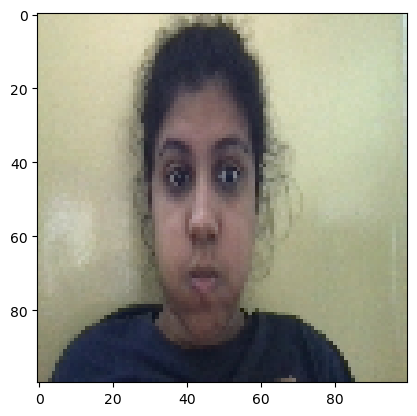

In [16]:
plt.imshow(img)

# 3.3 Create Labelled Dataset

In [49]:
ones_like_positive = tf.ones_like(positive)
ones_like_anchor = tf.ones_like(anchor)


ValueError: Can't convert non-rectangular Python sequence to Tensor.